![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Resolvendo sistemas especiais

## Questão 1: Algoritmo

Uma matriz é dita tridiagonal quando só possui entradas diferentes de zero na diagonal,
e imediatamente acima ou abaixo dela.

Explique porque, ao fazer a eliminação, o algoritmo só precisa operar nas três "diagonais centrais".

Tendo a informação que a matriz é tridiagonal, podemos fazer uma eliminação de gauss de forma genérica, e achar uma fórmula para a solução do sistemas apenas com as 3 diagonais.

Dê um exemplo de uma matriz $4 \times 4$, com muitos zeros, mas para a qual o algoritmo de eliminação
vai ter que acessar e calcular nas entradas correspondentes a estes zeros.

Uma matriz tridiagonal 4x4 por exemplo: [[1, 3, 0, 0],[2, 4, 7, 0],[0, 5, 9, 10],[0, 0, 8, 11]]. Mesmo que possua os 0 em todas as linhas, isso não é aproveitado pelo algoritmo de emliminação normal.

Agora, escreva a função `tridiag_solve` para resolver sistemas tridiagonais, ou seja,
aqueles cuja matriz de coeficientes é tridiagonal.

Esta função deve realizar o algoritmo de eliminação,
mas, para ter uma boa performance, opere apenas nas entradas das diagonais centrais.

In [3]:
def tridiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float64))
    b = np.copy(np.asarray(b, dtype=np.float64))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"
    # YOUR CODE HERE

    Sdiag = []  # Criaremos vetores para representar as diagonais, diagonal superior
    Diag = []   # diagonal
    Idiag = []  # diagonal inferior

    for i in range(n):
        Diag.append(A[i][i])
        
        if i == 0:
            Idiag.append(0)
            Sdiag.append(A[i][i+1])

        elif i == (n-1):
            Idiag.append(A[i][i-1])
            Sdiag.append(0)
        
        else:
            Idiag.append(A[i][i-1])
            Sdiag.append(A[i][i+1])
    

    New_Sdiag = []
    New_b = []

    for i in range(n-1):
        if i == 0:
            New_Sdiag.append( Sdiag[i]/Diag[i] )
            New_b.append( b[i]/Diag[i] )
        
        else:
            Denominador = (Diag[i] - Idiag[i]*New_Sdiag[i-1])
            
            New_Sdiag.append( (Sdiag[i]) / Denominador )
            New_b.append( (b[i] - Idiag[i]*New_b[i-1]) / Denominador )
        
        if i == n-2:
            New_b.append( (b[i+1] - Idiag[i+1]*New_b[i]) / (Diag[i+1] - Idiag[i+1]*New_Sdiag[i]) )
    
    x = []
    for i in range(n-1, -1, -1):
        if i == n-1:
            x.append(New_b[i])
        else:
            
            x.append(New_b[i] - New_Sdiag[i]*x[(n-2) - (i)])

    return x[::-1]


In [4]:
A = [[1,2,0,0],[2,1,2,0],[0,3,9,3],[0,0,11,11]]
b=[1,4,9,11]
tridiag_solve(A, b)

[1.0, 0.0, 1.0, 0.0]

Qual o papel do primeiro assert?

Se estamos falando do assert colocado dentro da função tridiag_solve, ele verifica se as dimensões do sistema estão corretos. 
Verifica se a quantidade de equações é igual a quantidade de respostas.

Caso seja o assert abaixo. Ele usa o np.linalg.solve para verificar se a resposta dada pela nossa função é realmente coerente.

In [5]:
A = [[1, 2, 0], [2, 1, -1], [0, 1, -2]]
b = [1,1,1]

x1 = np.linalg.solve(A,b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-14, rtol=1e-14)

In [6]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert np.allclose(x1, x2, atol=1e-13, rtol=1e-13)

Se você não tivesse acesso a `np.linalg.solve`, como você poderia testar sua função?
Explique abaixo, e dê um exemplo de teste na caixa seguinte.

Pegaria matrizes tridiagonais de 2 tamanhos diferentes (3x3 e 5x5), multiplicaria ela com algum vetor conhecido ([2, 1, 1] e [-2, 0, 1, 3, -1]), obteria a resposta. 
Agora eu jogaria a matriz e a resposta na função tridiag_solve, e ela deve retornar justamente os vetores conhecidos.

In [7]:
# Exemplo de teste
# YOUR CODE HERE
A1 = [
    [1, 7, 0],
    [2, 0, 4],
    [0, 3, 8]
]

r1 = [2, 1, 1]      # Faremos o produto A1*r1.
b1 = [9, 8, 11]     # Resposta do produto.

x1 = tridiag_solve(A1, b1)  # Resposta obtida pela função
assert np.allclose(r1, x1, atol=1e-13, rtol=1e-13)

A2 = [
    [1, 7, 0, 0,  0],
    [2, 2, 4, 0,  0],
    [0, 3, 8, 1,  0],
    [0, 0, 1, 2, -3],
    [0, 0, 0, -1, 2]
]

r2 = [-2, 0, 1, 3, -1]
b2 = [-2, 0, 11, 10, -5]

x2 = tridiag_solve(A2, b2)
assert np.allclose(r2, x2, atol=1e-13, rtol=1e-13)


In [8]:
np.random.seed(9)
A = np.random.randn(5,5)
b = [1,2,3,4,5]

print(A)
x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
print(x1)
print(x2)
print(x1-x2)

[[ 1.10855471e-03 -2.89544069e-01 -1.11606630e+00 -1.28827567e-02
  -3.78361464e-01]
 [-4.81135363e-01 -1.51733118e+00 -4.90871981e-01 -2.40680579e-01
  -6.47947460e-01]
 [ 6.35891080e-01  1.74011731e+00  2.96682218e-01  7.07503662e-01
   1.82281576e+00]
 [ 4.30769029e-01  1.54272963e+00 -9.00721171e-01 -1.37125010e-01
   1.29757901e+00]
 [ 6.75271167e-01  3.19581170e-02  9.18145896e-01  3.80509466e-01
   5.16367487e-01]]
[ 7.23031904 -4.91901527 -1.35854848 -3.13315701  5.25656275]
[18.43580992432919, -3.383121949524395, -11.686965037018219, 17.46187959426001, -3.184574025471087]
[-11.20549088  -1.53589332  10.32841656 -20.59503661   8.44113678]


In [9]:
np.random.seed(9)
A = np.random.randn(5,5)
b = [1,2,3,4,5]


x1 = np.linalg.solve(A, b)
x2 = tridiag_solve(A, b)
assert not np.allclose(x1, x2, atol=1e-3, rtol=1e-3)

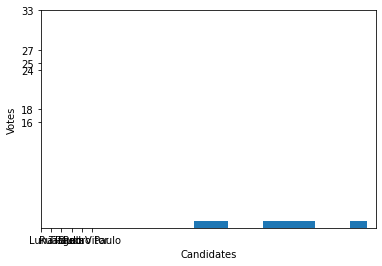

In [2]:
import matplotlib.pyplot as plt

# data
data = [33, 27, 25, 24, 18, 16]

# create histogram
plt.hist(data)

# add labels for each bar
plt.xticks([1, 2, 3, 4, 5, 6], ['Luna', 'Ruan', 'Tiago', 'Duda', 'Paulo Vitor', 'Pedro Paulo'])

# add y-axis tick marks and labels
plt.yticks(data, data)

# add axes labels
plt.xlabel('Candidates')
plt.ylabel('Votes')

# show plot
plt.show()



Explique o resultado dos testes acima.

YOUR ANSWER HERE

## Questão 2: Tempos

Para cada um dos `ns` dados a seguir, monte um sistema tridiagonal $n \times n$,
e calcule o tempo (usando `time`) para:
1. Criar a matriz A e o vetor b (podem ser aleatórios, podem não ser)
2. Resolver o sistema usando `tridiag_solve`

Armazene os tempos em duas listas, `t_create` e `t_solve`.

Obs: a caixa abaixo pode usar algo como 500M de RAM, por conta das matrizes 4k
(ou até mais, dependendo de **como** você criar as matrizes).
Assim, para testar, diminua a amplitude do logspace, terminando em $2^{10}$ em vez de $2^{12}$.
Se você não conseguir fazer funcionar até $2^{12}$,
reduza o maior valor do `logspace`, mas não reduza demais.

Obs2: A caixa abaixo deve ser executada em menos de 60 segundos, para não dar `TimeOut`.

In [10]:
%%time

ns = np.logspace(4,12, base=2, num=28, dtype=int)
t_create = []
t_solve  = []

for i, n in enumerate(ns):
    # Create
    A = np.zeros((n, n))  # Criando uma matriz nxn de zeros.

    Sdiag = np.random.randint(1, high=3, size=(1, n))[0]   # Criando os valores que entrarão nas diagonais
    Diag = np.random.randint(1, high=3, size=(1, n))[0]
    Idiag = np.random.randint(1, high=3, size=(1, n))[0]
    
    b = np.random.randint(-2, high=2, size=(1, n))
    
    for i in range(n):  # Adicionando os valores nas diagonais.
        A[i][i] += Diag[i]
        
        if i == 0:
            A[i][i+1] += Idiag[i]

        elif i == (n-1):
            A[i][i-1] += Sdiag[i]
            
        
        else:
            A[i][i-1] += Sdiag[i]
            A[i][i+1] += Idiag[i]

    

CPU times: total: 62.5 ms
Wall time: 72.8 ms


Agora, faça um gráfico destes tempos, em função de $n$.

In [11]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

NotImplementedError: 

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

In [ ]:
for l in ax.lines:
    xs = l.get_xdata()
    assert min(xs) == 2**4
    assert 2**9 <= max(xs) <= 2**13

In [ ]:
ax = None

Qual etapa demora mais?
Porquê você acha que isso acontece?

YOUR ANSWER HERE

Agora, faça novos gráficos, para tentar descobrir a taxa de crescimento destes tempos:
se é linear, quadrático, exponencial, ... em função de $n$.

E se são a mesma taxa ou não!

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Comente

YOUR ANSWER HERE

## Questão 3: Sistemas pentadiagonais

Agora, suponha que a matriz $A$ é pentadiagonal, ou seja, as entradas não-nulas
podem estar até 2 linhas acima ou abaixo da diagonal principal.
Generalize o seu programa para resolver sistemas pentadiagonais.

In [26]:
def pentadiag_solve(A, b):
    A = np.copy(np.asarray(A, dtype=np.float64))
    b = np.copy(np.asarray(b, dtype=np.float64))
    n,m = np.shape(A)
    assert m == len(b)
    assert n == m, "Matrix must be square"

    # Declara os arrays que serão as 'novas diagonais'
    c_ = [0 for i in range(n)]
    d_ = [0 for i in range(n)]
    x = [0 for i in range(n)]

    # Extrai as diagonais superiores da matriz
    UpperDiagonal1 = [A[i][i-1] for i in range(1, n)]
    UpperDiagonal2 = [A[i][i-2] if i-2>=0 else 0 for i in range(0, n-2)]

    # Extrai a diagonal principal da matriz
    Diagonal = [A[i][i] for i in range(n)]

    # Extrai as diagonais inferiores da matriz
    LowerDiagonal1 = [A[i][i+1] for i in range(n-1)]
    LowerDiagonal2 = [A[i][i+2] if i+2<n else 0 for i in range(0, n-2)]


    # Realiza a etapa de substituição para a frente
    c_[0] = LowerDiagonal1[0] / Diagonal[0]
    d_[0] = b[0] / Diagonal[0]
    c_[1] = LowerDiagonal1[1] / (Diagonal[1] - UpperDiagonal1[1] * c_[0] - UpperDiagonal2[1] * d_[0])
    d_[1] = (b[1] - UpperDiagonal1[1] * d_[0] - UpperDiagonal2[1] * b[0]) / (Diagonal[1] - UpperDiagonal1[1] * c_[0] - UpperDiagonal2[1] * d_[0])
    for i in range(2, n):
        print('i')
        c_[i] = LowerDiagonal1[i] / (Diagonal[i] - UpperDiagonal1[i] * c_[i - 1] - UpperDiagonal2[i] * c_[i - 2] - LowerDiagonal1[i - 1] * d_[i - 1] - LowerDiagonal2[i - 1] * d_[i - 2])
        d_[i] = (b[i] - UpperDiagonal1[i] * d_[i - 1] - UpperDiagonal2[i] * b[i - 2] - LowerDiagonal1[i - 1] * b[i - 1] - LowerDiagonal2[i - 1] * b[i - 2]) / (Diagonal[i] - UpperDiagonal1[i] * c_[i - 1] - UpperDiagonal2[i] * c_[i - 2] - LowerDiagonal1[i - 1] * d_[i - 1] - LowerDiagonal2[i - 1] * d_[i - 2])

    # Fazendo a substituição de baixo pra cima.
    x[n - 1] = d_[n - 1]
    x[n - 2] = d_[n - 2] - c_[n - 2] * x[n - 1]
    for i in range(n - 3, -1, -1):
        x[i] = d_[i]

    return x


In [28]:
np.random.seed(9)
A = np.diag(range(3,8)) + np.diag([-1,-1,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-1)
b = np.random.randn(5)

x2 = tridiag_solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x3, x2, atol=1e-13, rtol=1e-13)

i
i


IndexError: list index out of range

In [ ]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,-2,-2], k=2) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

In [ ]:
np.random.seed(10)
A = np.diag(range(3,9)) + np.diag([-1,-1,0,-2,-2], k=1) + np.diag([-2,-2,-1,-1], k=-2)
b = np.random.randn(6)

x1 = np.linalg.solve(A, b)
x3 = pentadiag_solve(A, b)
assert np.allclose(x1, x3, atol=1e-13, rtol=1e-13)

Repita os cálculos de tempo, para resolver sistemas de dimensão até $2^{12}$.

In [ ]:
ns = np.logspace(4,12, base=2, num=28, dtype=int)
t_create = []
t_solve  = []
for i, n in enumerate(ns):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.get_title() != ""

O que mudou?

YOUR ANSWER HERE

## Questão 4: Velocidade

Seu método tridiagonal é mais rápido do que `np.linalg.solve` para matrizes $10 \times 10$?
Para qual $n$, aproximadamente, seu método fica mais rápido?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

E como é a qualidade da solução?
Faça cálculos na caixa abaixo, e comente em seguida.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE